<a href="https://colab.research.google.com/github/MehrdadDastouri/sine_wave_lstm/blob/main/%20sine_wave_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-21b7113a646e>:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Add feature dimension


Epoch [10/100], Loss: 0.4047
Epoch [20/100], Loss: 0.2259
Epoch [30/100], Loss: 0.1076
Epoch [40/100], Loss: 0.0120
Epoch [50/100], Loss: 0.0051
Epoch [60/100], Loss: 0.0025
Epoch [70/100], Loss: 0.0004
Epoch [80/100], Loss: 0.0004
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001


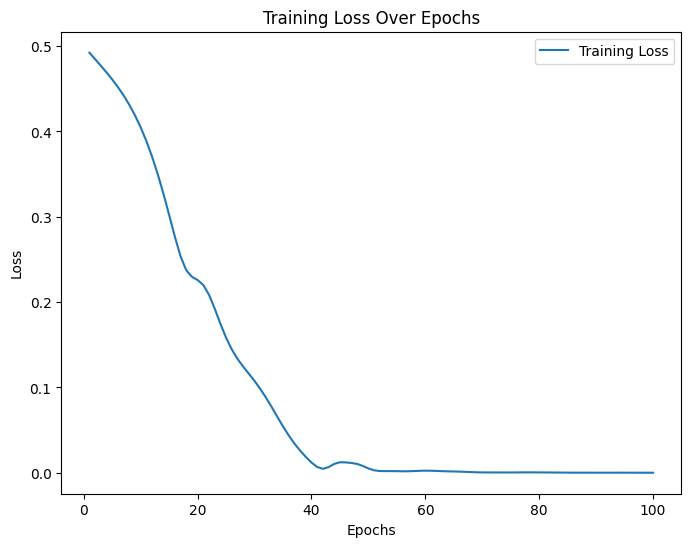

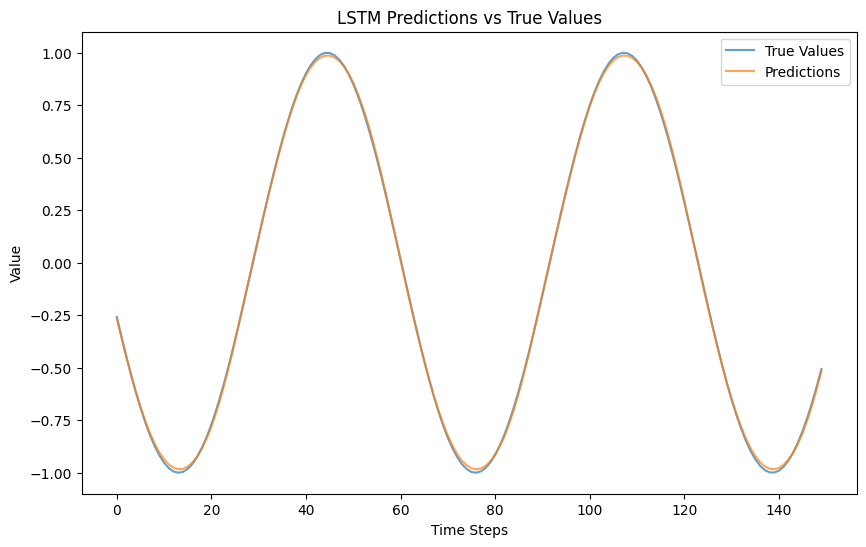

In [4]:
# Import necessary libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic sine wave data
def generate_data(seq_length=50, num_samples=1000):
    x = np.linspace(0, 100, num_samples)
    y = np.sin(x)
    data = []
    for i in range(len(y) - seq_length):
        data.append((y[i:i + seq_length], y[i + seq_length]))
    return data

seq_length = 50
data = generate_data(seq_length)
train_data = data[:800]
test_data = data[800:]

# Convert data to PyTorch tensors
def prepare_data(data):
    X, y = zip(*data)
    X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Add feature dimension
    y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)
    return X, y

X_train, y_train = prepare_data(train_data)
X_test, y_test = prepare_data(test_data)

# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)  # Hidden state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)  # Cell state
        out, _ = self.lstm(x, (h0, c0))  # LSTM forward pass
        out = self.fc(out[:, -1, :])  # Take only the last output
        return out

# Initialize the model
input_size = 1
hidden_size = 64
output_size = 1
num_layers = 2
model = LSTM(input_size, hidden_size, output_size, num_layers)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 100
train_losses = []
for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze().numpy()

# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.squeeze().numpy(), label="True Values", alpha=0.7)
plt.plot(range(len(predictions)), predictions, label="Predictions", alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("LSTM Predictions vs True Values")
plt.legend()
plt.show()